# Showcasing the results
1. Estimation performance
2. Hypothesis testing performance

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import seaborn as sns
import os

In [2]:
rls_list = []

for simulate_snpset in ["hm3", "all"]:
    for estimate_snpset in ["hm3", "all"]:
        for pcausal in [0.005, 0.1, 1.0]:
            for rho in [0.5, 0.8, 1.0]:
                f_name = f"out/estimate/snpset-{simulate_snpset}-varg-1.0-pcausal-{pcausal}-rho-{rho}.{estimate_snpset}.estimate.json"
                if not os.path.exists(f_name):
                    continue
                with open(f_name) as f:
                    data = json.load(f)

                    df_tmp = pd.DataFrame(
                        np.array([d["estimate"] for d in data]),
                        columns=["estimated_var_g", "estimated_rho", "estimated_var_e"],
                    )
                    df_tmp["simulate_snpset"] = simulate_snpset
                    df_tmp["estimate_snpset"] = estimate_snpset
                    df_tmp["rho"] = rho
                    df_tmp["pcausal"] = pcausal
                    rls_list.append(df_tmp)

df_plot = pd.concat(rls_list)
df_plot["estimated_ratio"] = df_plot["estimated_rho"] / df_plot["estimated_var_g"]

In [3]:
df_plot.groupby(["simulate_snpset", "estimate_snpset", "rho", "pcausal"]).mean()

estimated_var_g  estimated_rho  \
simulate_snpset estimate_snpset rho pcausal                                   
all             all             0.5 0.005           1.039814       0.490214   
                                    0.100           0.961206       0.405601   
                                    1.000           0.955682       0.511110   
                                0.8 0.005           1.031851       0.799252   
                                    0.100           0.951478       0.701221   
                                    1.000           0.959931       0.796297   
                                1.0 0.005           1.023417       1.007220   
                                    0.100           0.943617       0.905267   
                                    1.000           0.970420       0.977177   
                hm3             0.5 0.005           0.456592       0.207788   
                                    0.100           0.428893       0.171768   
                                    1.000           0.425679       0.205577   
                                0.8 0.005           0.455020       0.334135   
                                    0.100           0.424257       0.293108   
                                    1.000           0.426722       0.323307   
                                1.0 0.005           0.455082       0.418135   
                                    0.100           0.420408       0.376132   
                                    1.000           0.430054       0.398516   
hm3             all             0.5 0.005           1.969475       1.158515   
                                    0.100           1.875409       1.061967   
                                    1.000           1.851694       1.033958   
                                0.8 0.005           1.990452       1.771388   
                                    0.100           1.882804       1.660623   
                                    1.000           1.864156       1.626014   
                                1.0 0.005           2.016203       2.173178   
                                    0.100           1.896996       2.056272   
                                    1.000           1.880647       2.021007   
                hm3             0.5 0.005           1.096929       0.614412   
                                    0.100           1.035860       0.542505   
                                    1.000           1.023106       0.540808   
                                0.8 0.005           1.112825       0.936116   
                                    0.100           1.036470       0.855038   
                                    1.000           1.032698       0.851773   
                                1.0 0.005           1.128183       1.149530   
                                    0.100           1.039049       1.062324   
                                    1.000           1.042997       1.062321   

                                             estimated_var_e  estimated_ratio  
simulate_snpset estimate_snpset rho pcausal                                    
all             all             0.5 0.005           0.997943         0.476963  
                                    0.100           1.003354         0.419165  
                                    1.000           1.009161         0.539100  
                                0.8 0.005           0.998918         0.778017  
                                    0.100           1.004256         0.735774  
                                    1.000           1.008775         0.835404  
                                1.0 0.005           0.999856         0.986239  
                                    0.100           1.005006         0.962686  
                                    1.000           1.007410         1.010938  
                hm3             0.5 0.005           1.027073         0.463286  
                                    0.100           1.028242         0.398188  
  

In [10]:
df_tmp = df_plot[
    (df_plot.simulate_snpset == "all") & (df_plot.estimate_snpset == "hm3")
]

Text(0, 0.5, 'Estimated $r_g$')

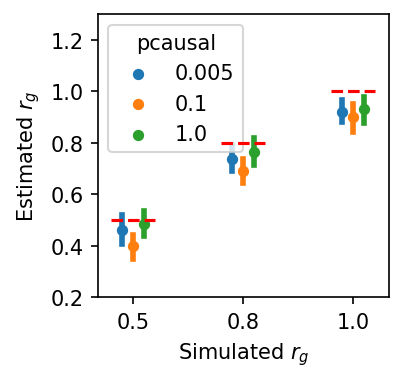

In [11]:
fig, ax = plt.subplots(figsize=(2.5, 2.5), dpi=150, sharex=True, sharey=True)
sns.pointplot(
    data=df_tmp,
    x="rho",
    y="estimated_ratio",
    hue="pcausal",
    dodge=0.2,
    join=False,
    ax=ax,
    markers=".",
)

list_rho = df_plot.rho.unique()

ax.hlines(
    list_rho,
    np.arange(len(list_rho)) - 0.2,
    np.arange(len(list_rho)) + 0.2,
    color="red",
    ls="--",
    zorder=10,
)
ax.set_ylim(0.2, 1.3)
ax.set_xlabel("Simulated $r_g$")
ax.set_ylabel("Estimated $r_g$")